<a href="https://colab.research.google.com/github/tongza331/CPE393_Coding_in_Ai/blob/main/7208_Lab5_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab5 - Training Deep Neural Network
- Patcharaporn Sirimom, 62070507208

Name your file to 7208.ipynb

## Lab Instruction 

In this lab, you will learn how to train a deep fully-connected neural network with Keras and Tensorflow. MNIST data, a Keras built-in dataset, will be used.

See http://yann.lecun.com/exdb/mnist

**Note:**
Before initiating on any machine learning/deep learning project, consider the following:
1. What is your problem and what data do you have?
- What kind of issue do you want to solve? 
- What data do you have? 
- What are you trying to predict? 
- Is there enough information in your data for your model to predict the expected output?

2. How do you measure success?
- What do you mean by "good model performance"? How do you know if your model is ready for deployment?
- Accuracy? What about precision and recall? AUC? ROC?

3. What is your method of evaluation?
- Holding method? CV? Iterate CV?

4. How should your data be preprocessed before being fed into a model?

5. What is your baseline? What is a model structure? How does your last layer look? What is the loss function? What is the optimization function? 

6. Develop an overfit model to determine the size of the model required by 
<br> 6.1 Add more layers
<br> 6.2 Increase the number of neurons
<br> 6.3 Train more epochs

7. Fine-tune your model to achieve a balance of underfit and overfit performance (optimization vs generalization)


**Exploding Gradients :**

Exploding gradients can produce an unstable network that, at best, cannot learn from the training data and, at worst, produces NaN weight values that cannot be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all necessary libraries to this project.

In [1]:
import tensorflow.keras
import numpy as np

### 1. Load MNIST data

In [2]:
from tensorflow.keras.datasets import mnist

### Load data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

Learn more about the data. For example:
- The distribution of target classes. 
- The characteristic of the input data. How does it look like? 
- etc.

In [3]:
## The distribution of target classes.
target_class = []
for i in train_labels:
    if i not in target_class:
        target_class.append(i)

target_class.sort()
target_class

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Train_set Label type: (60000,)


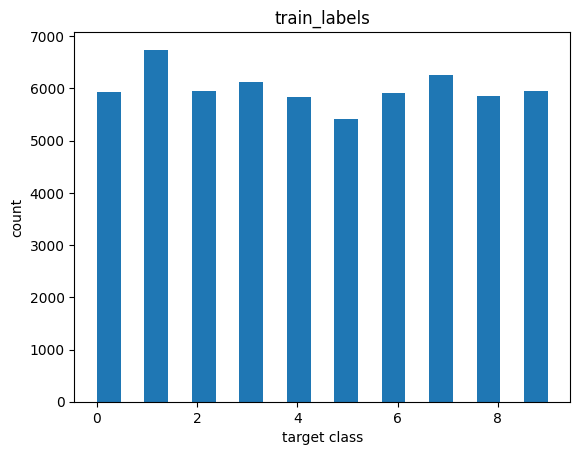

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Train_set Label type: %s'%str(train_labels.shape))
plt.hist(train_labels, bins=19)
plt.title('train_labels')
plt.xlabel('target class')
plt.ylabel('count')
plt.show()

Test_set Label type: (10000,)


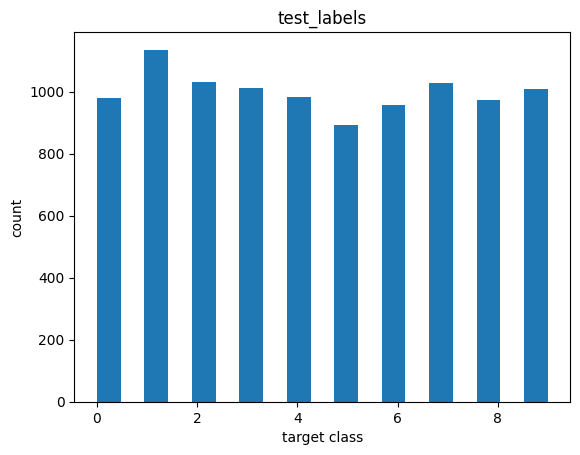

In [5]:
print('Test_set Label type: %s'%str(test_labels.shape))
plt.hist(test_labels, bins=19)
plt.title('test_labels')
plt.xlabel('target class')
plt.ylabel('count')
plt.show()

In [6]:
# Class
print('Feature Type: %s' %type(train_images))
print('Label Type: %s' %type(train_labels))

Feature Type: <class 'numpy.ndarray'>
Label Type: <class 'numpy.ndarray'>


In [7]:
# Shape
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


In [8]:
# Type
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### 2. Preprocess a data

In [9]:
# Reshape and Normalize
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

In [10]:
import tensorflow 
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
def plot_curve(history_opt):
    # loss curves
    plt.figure(figsize=[8,6])
    loss = history_opt.history['loss']
    val_loss = history_opt.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'orange', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

# Accuracy curves
    plt.figure(figsize=[8,6])
    acc = history_opt.history['accuracy']
    val_acc = history_opt.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'orange', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()  

In [99]:
def compare_plot(his1, his2, text1, text2):
    # loss curve
    plt.figure(figsize=[8,6])
    loss1 = his1.history['loss']
    val_loss1 = his1.history['val_loss']
    
    loss2 = his2.history['loss']
    val_loss2 = his2.history['val_loss']
    epochs = range(1, len(loss1) + 1)
    
    plt.plot(epochs, loss1, 'orange', label='%s Training loss'%str(text1))
    plt.plot(epochs, val_loss1, 'orange', linestyle = 'dashed', label='%s Validation loss'%str(text1))
    
    plt.plot(epochs, loss2, 'b', label='%s Training loss'%str(text2))
    plt.plot(epochs, val_loss2, 'b', linestyle = 'dashed', label='%s Validation loss'%str(text2))
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.figure(figsize=[8,6])
    acc1 = his1.history['accuracy']
    val_acc1 = his1.history['val_accuracy']
    
    acc2 = his2.history['accuracy']
    val_acc2 = his2.history['val_accuracy']
    epochs = range(1, len(acc1) + 1)
    
    plt.plot(epochs, acc1, 'orange', label='%s Training acc'%str(text1))
    plt.plot(epochs, val_acc1, 'orange', linestyle = 'dashed', label='%s Validation acc'%str(text1))
    
    plt.plot(epochs, acc2, 'b', label='%s Training acc'%str(text2))
    plt.plot(epochs, val_acc2, 'b', linestyle = 'dashed', label='%s Validation acc'%str(text2))
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

### 3. Build a model 

Build a five-fully connected layer with 128 neurons each, *elu* as an activation function, and *he initialier* as a weight initialier function using `Sequential()`.
 
The output is a probability for each target class using *softmax* as an activation function. We will use the *Adam optimizer* with the *cross-entropy loss function*.

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import initializers

In [14]:
def baseline_model():
    base_network = models.Sequential()
    base_network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,)))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(128, activation='elu'))
    base_network.add(layers.Dense(10, activation='softmax'))
    base_network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return base_network

In [15]:
initailizer = tensorflow.keras.initializers.HeNormal()
values = initailizer(shape=(28,28))
values

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[ 1.03054218e-01,  9.89244953e-02, -2.49687731e-01,
         8.06172937e-02,  5.23671089e-03,  2.93017309e-02,
        -8.44068974e-02, -1.67194992e-01,  3.27241689e-01,
         3.91094059e-01, -7.14512095e-02, -9.48468149e-02,
        -2.76817799e-01,  5.89181244e-01,  1.35896385e-01,
         5.81198990e-01,  4.57230717e-01,  3.90162915e-01,
        -4.33672935e-01, -1.33641437e-01,  2.16480374e-01,
        -5.92861399e-02, -3.09517771e-01,  1.50402978e-01,
        -2.60153055e-01,  1.56844944e-01,  4.70954299e-01,
         1.73028708e-01],
       [ 6.88577071e-02,  5.09319961e-01, -1.02578849e-01,
         2.55567819e-01,  4.85466748e-01, -4.58808728e-02,
         4.91367757e-01,  2.47343421e-01,  2.19338566e-01,
         3.61141525e-02,  4.69755322e-01,  3.65138918e-01,
         1.59649581e-01, -2.98178077e-01, -2.69145548e-01,
         1.41240865e-01, -8.17100555e-02,  1.94425106e-01,
        -4.04666573e-01,  2.55598366e-0

In [16]:
def model_network():
  initializer = tensorflow.keras.initializers.HeNormal()
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

### 4. Train the model

We will train the model with 10 epochs and a batch size of 128.

To avoid information leakage to the test set, which would lead to overfitting, we will divide the data into three sets: train, test, and validation. Hence, we will divide the training data into 90% train set and 10% validation set.

Because the keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be evenly distributed in validation set. As a result, we must use sklearn's `train_test_split` function to divide the data into train and validation sets.

Hint: Use the parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [17]:
from sklearn.model_selection import train_test_split
import numpy as np

### Split data ###
test_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=test_size, stratify=train_labels)

## X is images, y is label
##################

In [18]:
## Baseline model
network_baseline = baseline_model()
history_baseline = network_baseline.fit(X_train, y_train, epochs=10, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 0.4939 - accuracy: 0.8468 - val_loss: 0.2271 - val_accuracy: 0.9290
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1483 - accuracy: 0.9536 - val_loss: 0.1476 - val_accuracy: 0.9583
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1041 - accuracy: 0.9668 - val_loss: 0.1233 - val_accuracy: 0.9628
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0783 - accuracy: 0.9753 - val_loss: 0.1045 - val_accuracy: 0.9663
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0597 - accuracy: 0.9803 - val_loss: 0.1001 - val_accuracy: 0.9718
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.1173 - val_accuracy: 0.9680
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0510 - accuracy: 0.9837 - val_loss: 0.0982 - val_accuracy: 0.9708
Epoch 

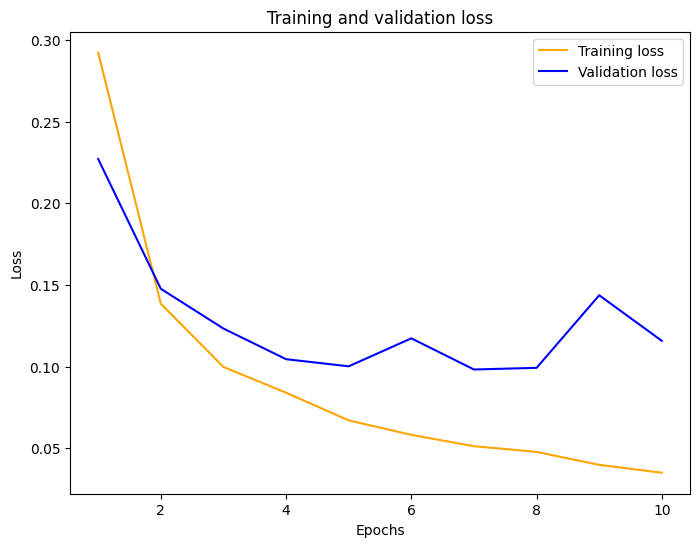

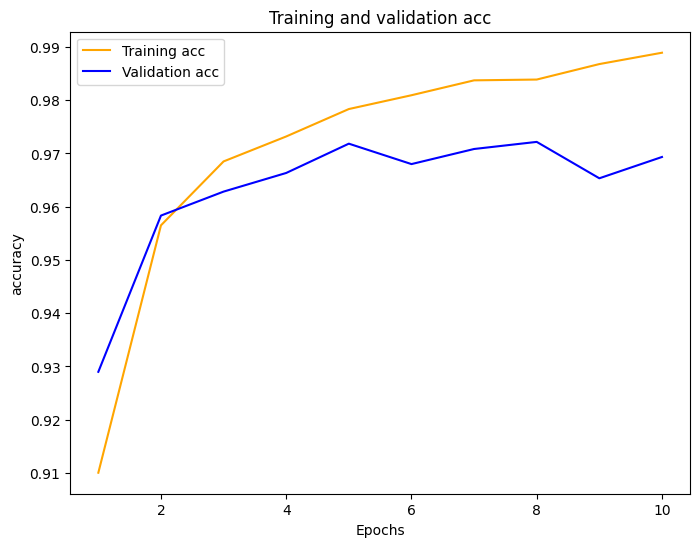

In [19]:
plot_curve(history_baseline)

In [20]:
### He Normal
network1 = model_network()
history = network1.fit(X_train, y_train, epochs=10, batch_size=128 ,validation_data=(X_val, y_val))
#####################

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.4319 - accuracy: 0.8645 - val_loss: 0.1546 - val_accuracy: 0.9498
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1214 - accuracy: 0.9620 - val_loss: 0.1340 - val_accuracy: 0.9603
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0813 - accuracy: 0.9742 - val_loss: 0.1332 - val_accuracy: 0.9610
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0641 - accuracy: 0.9799 - val_loss: 0.1153 - val_accuracy: 0.9698
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0528 - accuracy: 0.9835 - val_loss: 0.1213 - val_accuracy: 0.9687
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0492 - accuracy: 0.9831 - val_loss: 0.1303 - val_accuracy: 0.9653
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0422 - accuracy: 0.9856 - val_loss: 0.1057 - val_accuracy: 0.9698
Epoch 

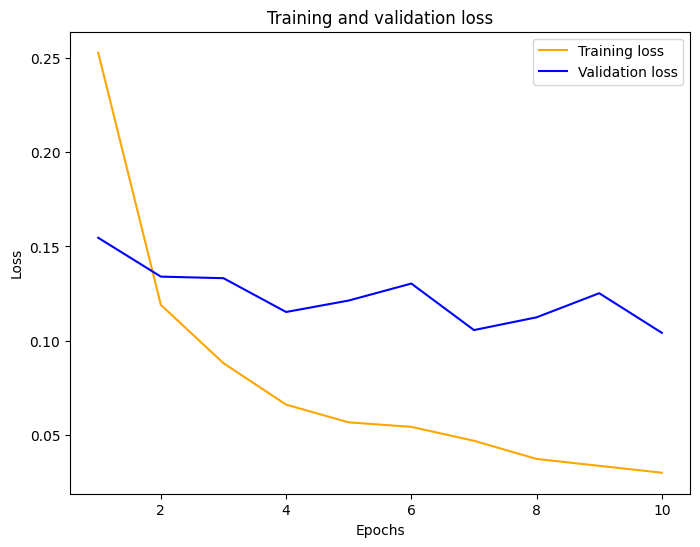

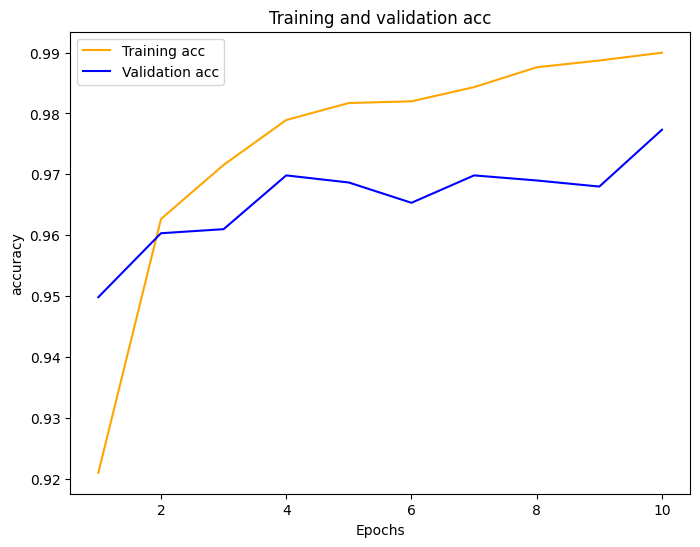

In [21]:
plot_curve(history)

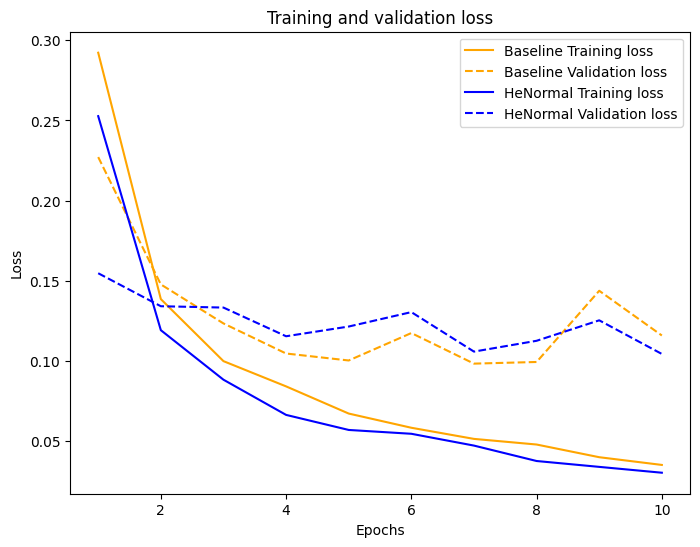

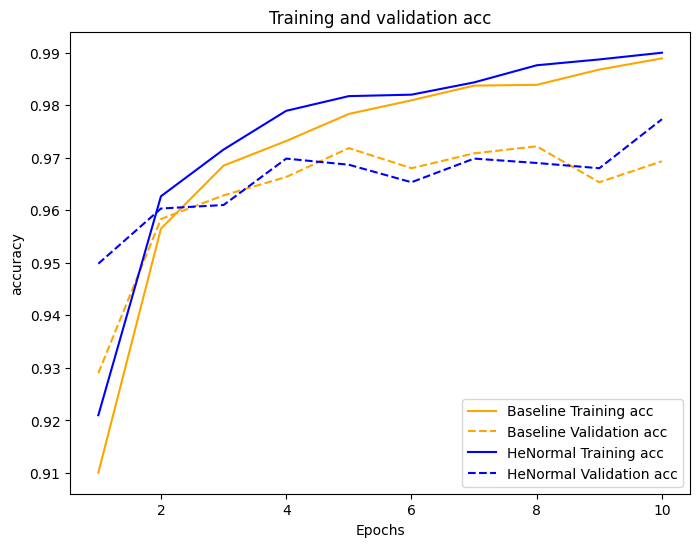

In [100]:
compare_plot(history_baseline, history,'Baseline','HeNormal')

### 5. Evalute the model

Consider the metric you want to use to evaluate/measure the performance of your model in order to answer the following questions:
1. Is the model overfit or underfit?
2. At what epoch/iteration does it converge or does the model overfit?
3. How does the model perform across all data classes? What is your model's overall performance?


In [22]:
### Evaluate the baseline model ###
test_loss_base, test_acc_base = network_baseline.evaluate(test_images, test_labels)
print('Test Loss Baseline: %s\nTest Accuracy Baseline: %s' % (test_loss_base,test_acc_base))

313/313 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9738
Test Loss Baseline: 0.1001250147819519
Test Accuracy Baseline: 0.973800003528595


In [23]:
### Evaluate the He initializer model ###
test_loss, test_acc = network1.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

313/313 [==============================] - 1s 3ms/step - loss: 0.0846 - accuracy: 0.9769
Test Loss: 0.08461476117372513
Test Accuracy: 0.9768999814987183


#### Answer

1. Model overfit (low bias, high variance)
2. Epoch at 2-3
3. Accuracy 97.69%

### 6. Tune the model 

Try to tune your model by: 
1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?
2. Apply an early stop. What do you get as a result? (See also https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try adding dropout (any dropout rate) with every layer. What effect does it have on your model? Does it help in the reduction of overfit?

*In the discussion section, discuss the result of these steps*

After completing the preceding steps, **try to achieve the highest precision** by tuning the model using what you have already learned in class. You can experiment with changing the model's structure by increasing or decreasing the number of layers and neuron nodes in each layer. (Use only fully-connected layers for now; no other types of layers!)

**The MNIST model's current highest precision is around 99.8%** (Just try as hard as you can; don't be concerned if you don't achieve this level of precision.)

**In each tuning step, write down what you're doing and why**

### 1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?

In [24]:
network2 = model_network()
history2 = network2.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 3s 5ms/step - loss: 0.4539 - accuracy: 0.8576 - val_loss: 0.1654 - val_accuracy: 0.9523
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.1287 - accuracy: 0.9604 - val_loss: 0.1499 - val_accuracy: 0.9547
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9722 - val_loss: 0.1238 - val_accuracy: 0.9632
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0676 - accuracy: 0.9781 - val_loss: 0.1175 - val_accuracy: 0.9655
Epoch 5/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0588 - accuracy: 0.9811 - val_loss: 0.1120 - val_accuracy: 0.9677
Epoch 6/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.1260 - val_accuracy: 0.9672
Epoch 7/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.1019 - val_accuracy: 0.9722
Epoch 

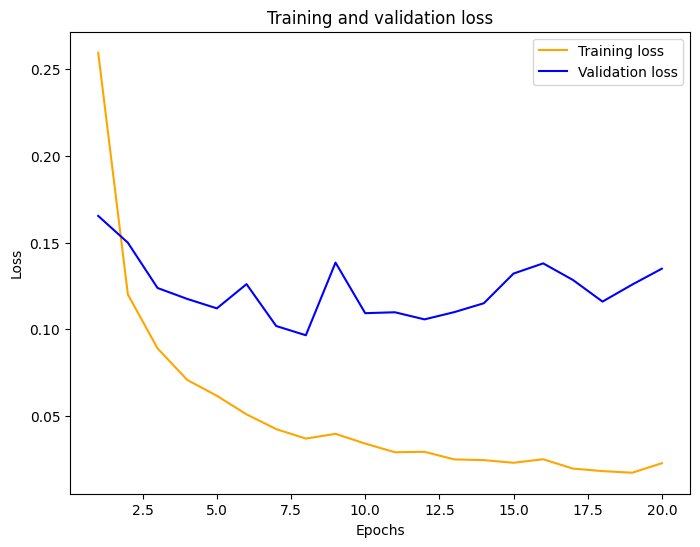

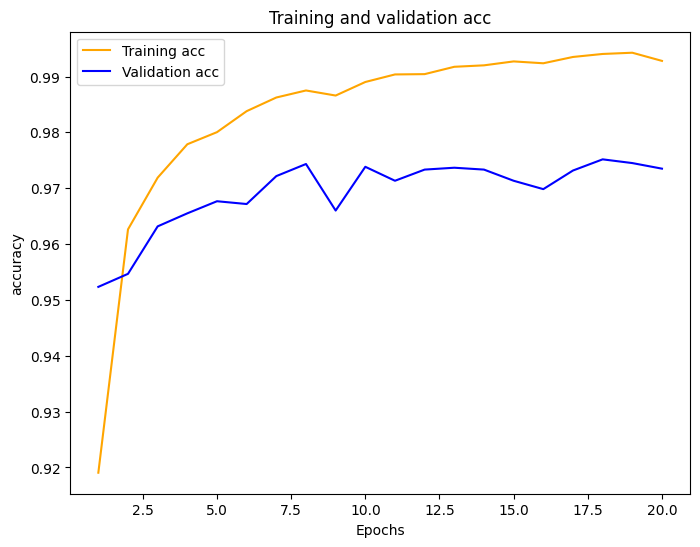

In [25]:
plot_curve(history2)

In [26]:
test_loss, test_acc = network2.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9777
Test Loss: 0.11098769307136536
Test Accuracy: 0.9776999950408936


#### Answer 6.1

เมื่อเพิ่ม epoch จาก 10 เป็น 20 พบว่า กราฟ loss ยังคง overfit และในส่วนของ Test loss ยังเพิ่มขึ้นอีกด้วย ถ้าเทียบกับ epoch=10 

### 2. Apply an early stop. What do you get as a result?

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=1, mode='min', verbose=1),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
]


In [29]:
network3 = model_network()
history3 = network3.fit(X_train, y_train, 
                       epochs=20, 
                       batch_size=128 ,
                       validation_data=(X_val, y_val),
                       callbacks=keras_callbacks,
                       verbose=2
                       )

Epoch 1/20
422/422 - 2s - loss: 0.2507 - accuracy: 0.9223 - val_loss: 0.1846 - val_accuracy: 0.9448

Epoch 00001: val_loss improved from inf to 0.18458, saving model to best_model.h5
Epoch 2/20
422/422 - 2s - loss: 0.1137 - accuracy: 0.9649 - val_loss: 0.1354 - val_accuracy: 0.9585

Epoch 00002: val_loss improved from 0.18458 to 0.13537, saving model to best_model.h5
Epoch 3/20
422/422 - 2s - loss: 0.0864 - accuracy: 0.9730 - val_loss: 0.1087 - val_accuracy: 0.9677

Epoch 00003: val_loss improved from 0.13537 to 0.10873, saving model to best_model.h5
Epoch 4/20
422/422 - 2s - loss: 0.0667 - accuracy: 0.9787 - val_loss: 0.1026 - val_accuracy: 0.9692

Epoch 00004: val_loss improved from 0.10873 to 0.10256, saving model to best_model.h5
Epoch 5/20
422/422 - 2s - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.1271 - val_accuracy: 0.9670

Epoch 00005: val_loss did not improve from 0.10256
Epoch 00005: early stopping


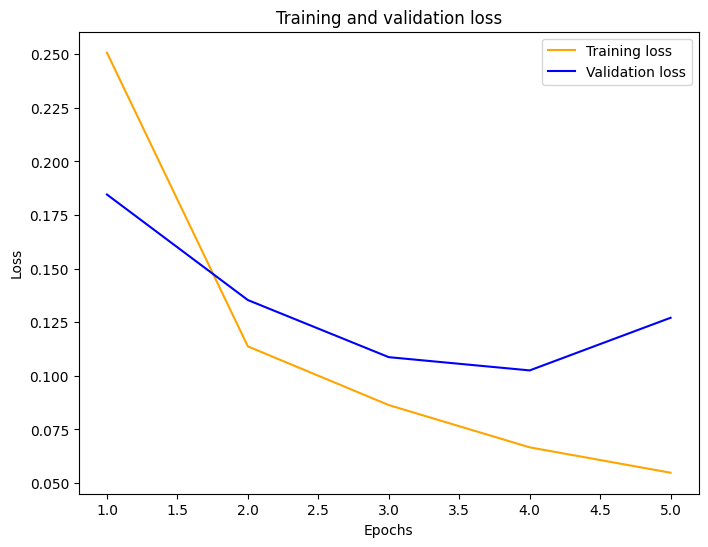

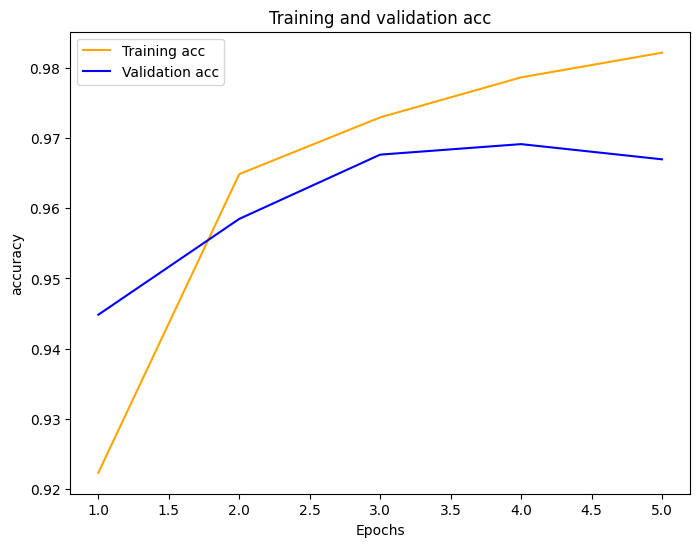

In [30]:
plot_curve(history3)

In [101]:
### Evaluate the model ###
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)
print('Test Loss of Non early stop: %s\nTest Accuracy: %s' % (test_loss2,test_acc2))

test_loss3, test_acc3 = network3.evaluate(test_images, test_labels)
print('Test Loss of Early stop: %s\nTest Accuracy: %s' % (test_loss3,test_acc3))
##########################

313/313 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9777
Test Loss of Non early stop: 0.11098769307136536
Test Accuracy: 0.9776999950408936
313/313 [==============================] - 1s 3ms/step - loss: 0.1010 - accuracy: 0.9697
Test Loss of Early stop: 0.10100027173757553
Test Accuracy: 0.9696999788284302


#### Answer Question 6.2

At the epoch 5/20 is early stopping. And the history3 (Use early stopping) looking better than history2 (Non use early stopping) model. Accuracy reduce to 96.96% but avoid overfitting model.

### 3. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?

#### 3.1.1 Try regularizers L1 with kernel+bias

In [32]:
## 3.1.1
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def model_network_L1():
    initializer = tensorflow.keras.initializers.HeNormal()
    alpha = 1e-3
    network = models.Sequential()
    network.add(layers.Dense(128, activation='elu', input_shape=(28*28,),kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , kernel_regularizer=regularizers.l1(alpha), bias_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network


In [33]:
network_L1 = model_network_L1()
history_L1 = network_L1.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 4s 8ms/step - loss: 9.3802 - accuracy: 0.8402 - val_loss: 3.2130 - val_accuracy: 0.9073
Epoch 2/20
422/422 [==============================] - 3s 8ms/step - loss: 2.4949 - accuracy: 0.9081 - val_loss: 1.3259 - val_accuracy: 0.9102
Epoch 3/20
422/422 [==============================] - 3s 8ms/step - loss: 1.1704 - accuracy: 0.9176 - val_loss: 0.9349 - val_accuracy: 0.9223
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.8689 - accuracy: 0.9262 - val_loss: 0.7905 - val_accuracy: 0.9250
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.7439 - accuracy: 0.9305 - val_loss: 0.6997 - val_accuracy: 0.9307
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.6796 - accuracy: 0.9326 - val_loss: 0.6526 - val_accuracy: 0.9345
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.6270 - accuracy: 0.9367 - val_loss: 0.6217 - val_accuracy: 0.9323
Epoch 

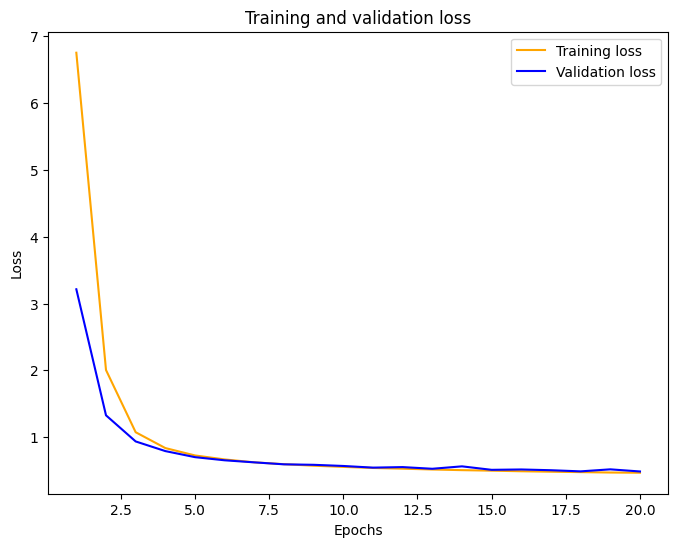

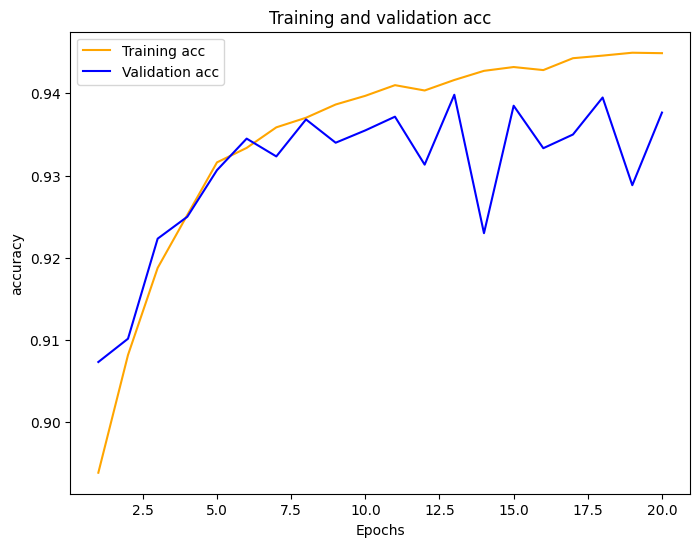

In [34]:
plot_curve(history_L1)

In [35]:
### Evaluate the model ###
test_loss, test_acc = network_L1.evaluate(test_images, test_labels)
print('Test Loss of network_L1 kernel+bias: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.4557 - accuracy: 0.9470
Test Loss of network_L1 kernel+bias: 0.4557051658630371
Test Accuracy: 0.9470000267028809


#### 3.1.2 Try L1 with Activity regularization

In [36]:
def model_network_L1_activity():
    initializer = tensorflow.keras.initializers.HeNormal()
    alpha = 1e-3
    network = models.Sequential()
    network.add(layers.Dense(128, activation='elu', input_shape=(28*28,),kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(128, activation='elu',kernel_initializer=initializer
                             , activity_regularizer=regularizers.l1(alpha)))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

In [37]:
network_L1_activity = model_network_L1_activity()
history_L1_activity = network_L1_activity.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 4s 8ms/step - loss: 0.8130 - accuracy: 0.8626 - val_loss: 0.4589 - val_accuracy: 0.9530
Epoch 2/20
422/422 [==============================] - 3s 7ms/step - loss: 0.4206 - accuracy: 0.9564 - val_loss: 0.3946 - val_accuracy: 0.9573
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3548 - accuracy: 0.9669 - val_loss: 0.3795 - val_accuracy: 0.9575
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3161 - accuracy: 0.9721 - val_loss: 0.3480 - val_accuracy: 0.9593
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.2997 - accuracy: 0.9739 - val_loss: 0.3420 - val_accuracy: 0.9578
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.2820 - accuracy: 0.9737 - val_loss: 0.3277 - val_accuracy: 0.9630
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.2619 - accuracy: 0.9775 - val_loss: 0.3138 - val_accuracy: 0.9610
Epoch 

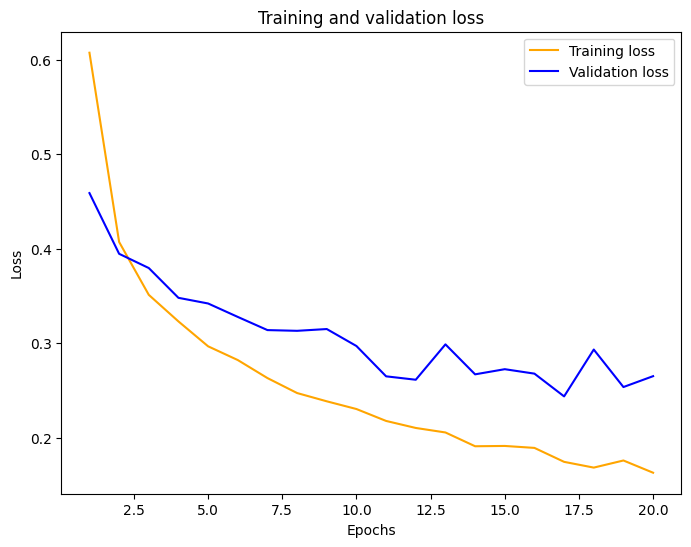

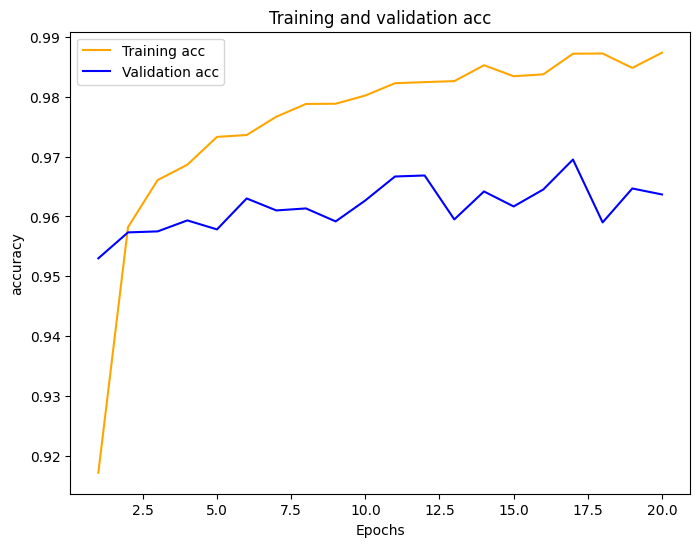

In [38]:
plot_curve(history_L1_activity)

In [39]:
### Evaluate the model ###
test_loss, test_acc = network_L1_activity.evaluate(test_images, test_labels)
print('Test Loss of network_L1 activity: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.2388 - accuracy: 0.9686
Test Loss of network_L1 activity: 0.23880839347839355
Test Accuracy: 0.9685999751091003


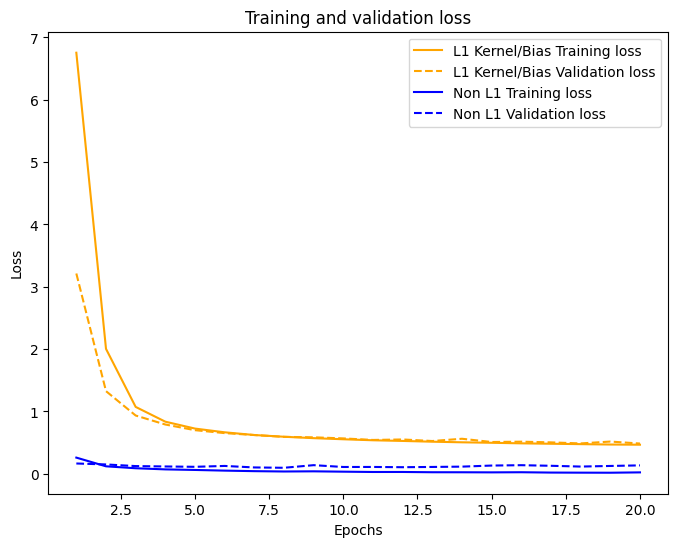

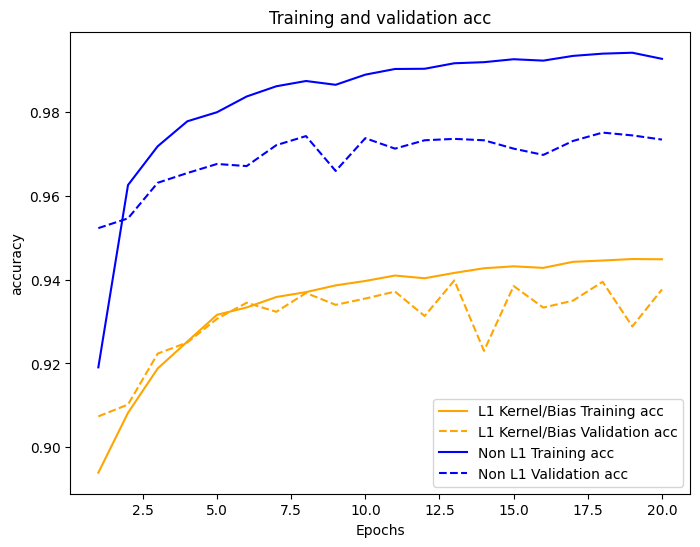

In [40]:
compare_plot(history_L1, history2,'L1 Kernel/Bias','Non L1')

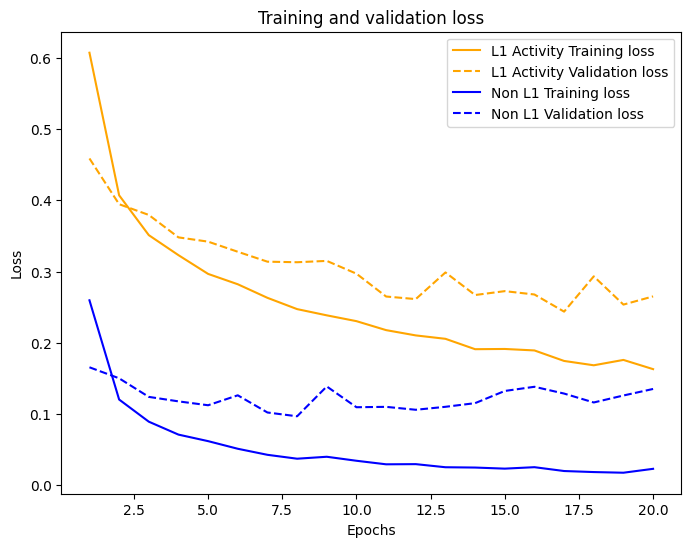

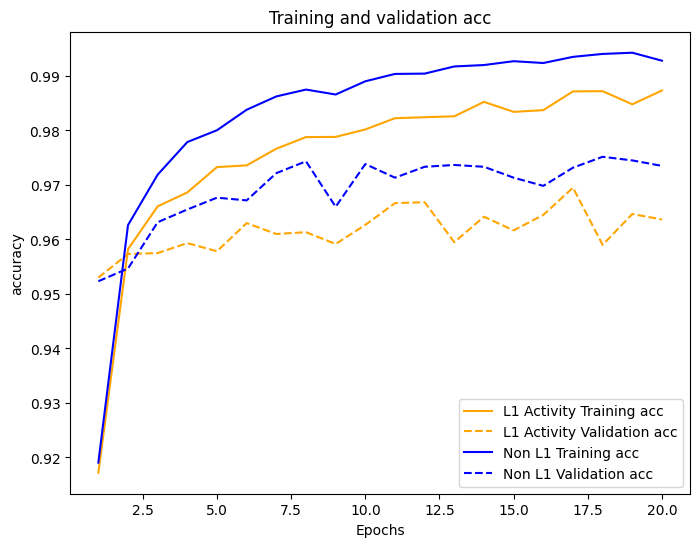

In [41]:
compare_plot(history_L1_activity, history2,'L1 Activity','Non L1')

#### Discussion while using L1 Kernel/Bias และ Activity at Learning rate 1e-3


#### 3.2.1 Try L2 Kernel/Bias

In [42]:
## 3.2.1 
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def model_network_L2():
  initializer = tensorflow.keras.initializers.HeNormal()
  alpha = 1e-3
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l2(alpha), bias_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [43]:
network_L2 = model_network_L2()
history_L2 = network_L2.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 1.8118 - accuracy: 0.8536 - val_loss: 1.1188 - val_accuracy: 0.9505
Epoch 2/20
422/422 [==============================] - 3s 7ms/step - loss: 0.9885 - accuracy: 0.9575 - val_loss: 0.7423 - val_accuracy: 0.9560
Epoch 3/20
422/422 [==============================] - 3s 7ms/step - loss: 0.6689 - accuracy: 0.9589 - val_loss: 0.5448 - val_accuracy: 0.9555
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.4890 - accuracy: 0.9611 - val_loss: 0.4528 - val_accuracy: 0.9512
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.3961 - accuracy: 0.9619 - val_loss: 0.3834 - val_accuracy: 0.9548
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.3391 - accuracy: 0.9625 - val_loss: 0.3305 - val_accuracy: 0.9602
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.2944 - accuracy: 0.9677 - val_loss: 0.3083 - val_accuracy: 0.9558
Epoch 

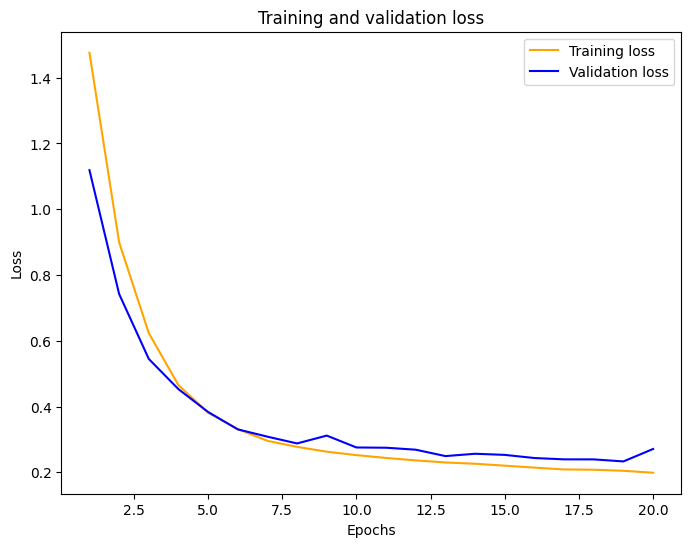

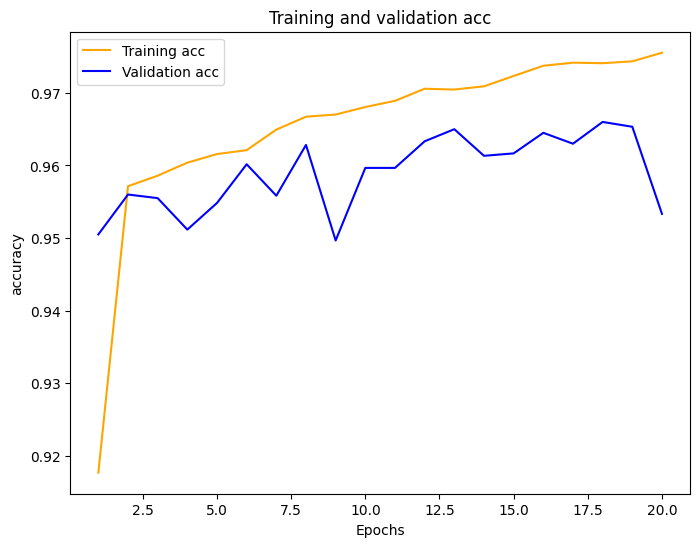

In [44]:
plot_curve(history_L2)

In [45]:
### Evaluate the model ###
test_loss, test_acc = network_L2.evaluate(test_images, test_labels)
print('Test Loss of network_L2 Kernel/Bias: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.2424 - accuracy: 0.9622
Test Loss of network_L2 Kernel/Bias: 0.2424262911081314
Test Accuracy: 0.9621999859809875


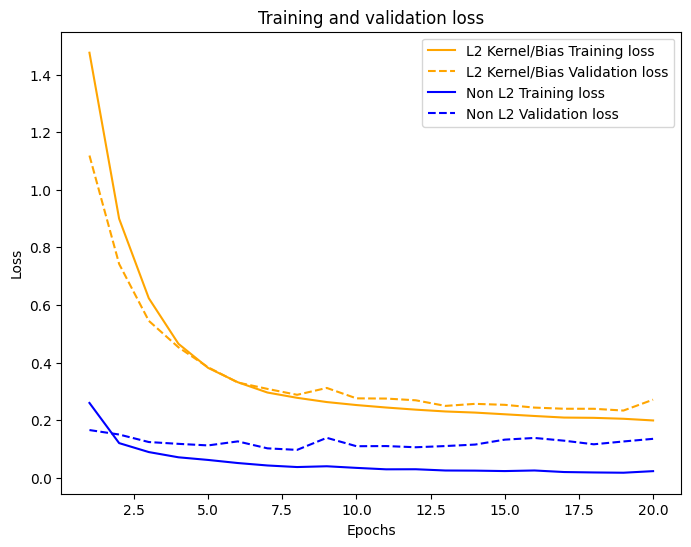

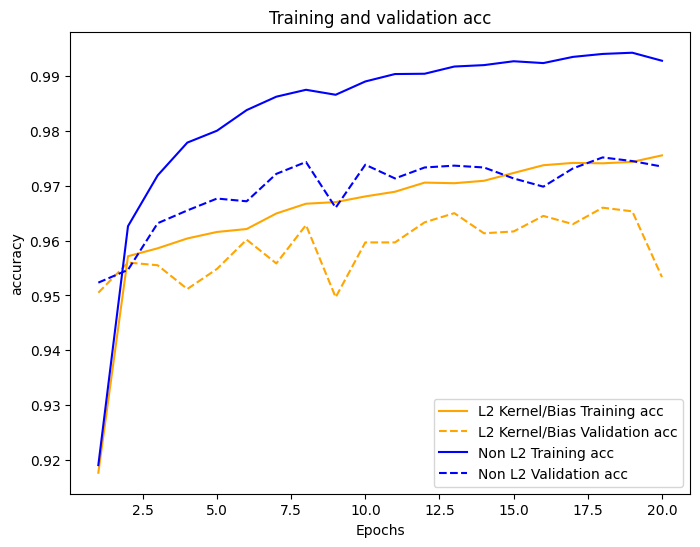

In [46]:
compare_plot(history_L2, history2,'L2 Kernel/Bias','Non L2')

#### 3.2.2 Try L2 with Activity

In [47]:
def model_network_L2_activity():
  initializer = tensorflow.keras.initializers.HeNormal()
  alpha = 1e-3
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l2(alpha)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [48]:
network_L2_activity = model_network_L2_activity()
history_L2_activity = network_L2_activity.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 4s 8ms/step - loss: 0.7124 - accuracy: 0.8525 - val_loss: 0.3214 - val_accuracy: 0.9508
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2895 - accuracy: 0.9559 - val_loss: 0.2622 - val_accuracy: 0.9567
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2282 - accuracy: 0.9678 - val_loss: 0.2461 - val_accuracy: 0.9588
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2037 - accuracy: 0.9722 - val_loss: 0.2443 - val_accuracy: 0.9585
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1875 - accuracy: 0.9743 - val_loss: 0.2266 - val_accuracy: 0.9615
Epoch 6/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1756 - accuracy: 0.9761 - val_loss: 0.2114 - val_accuracy: 0.9658
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1505 - accuracy: 0.9823 - val_loss: 0.2098 - val_accuracy: 0.9652
Epoch 

In [49]:
### Evaluate the model ###
test_loss, test_acc = network_L2_activity.evaluate(test_images, test_labels)
print('Test Loss of network_L2 Activity: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1773 - accuracy: 0.9711
Test Loss of network_L2 Activity: 0.17728033661842346
Test Accuracy: 0.9710999727249146


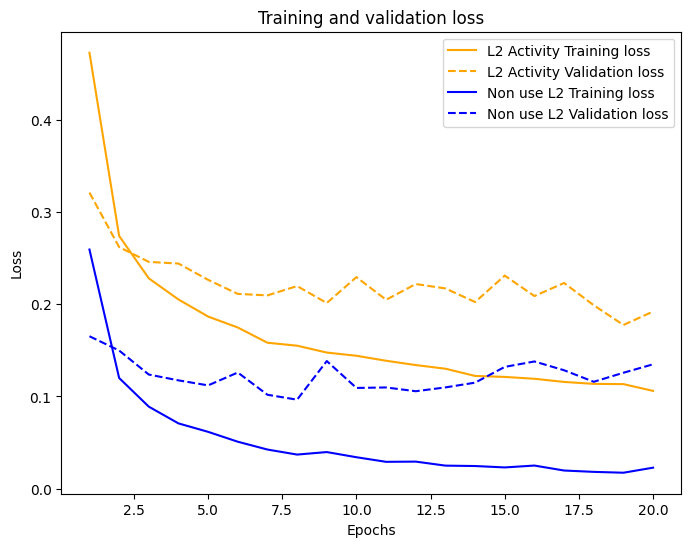

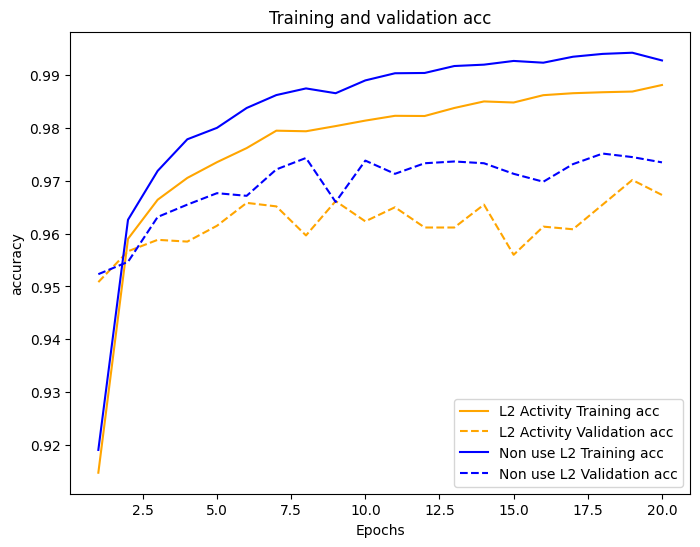

In [50]:
compare_plot(history_L2_activity, history2,'L2 Activity', 'Non use L2')

#### 3.3.1 Try L1L2 with Kernel/Bias

In [51]:
## 3.3 Using L1 L2
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def model_network_L1L2():
  initializer = tensorflow.keras.initializers.HeNormal()
  alpha1 = 1e-3
  alpha2 = 1e-3
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))

  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
    
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))

  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
    
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))

  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , kernel_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)
                           , bias_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [52]:
network_L1L2 = model_network_L1L2()
history_L1L2 = network_L1L2.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 5s 9ms/step - loss: 9.9636 - accuracy: 0.8459 - val_loss: 2.7754 - val_accuracy: 0.8950
Epoch 2/20
422/422 [==============================] - 4s 8ms/step - loss: 2.1372 - accuracy: 0.8975 - val_loss: 1.2078 - val_accuracy: 0.8985
Epoch 3/20
422/422 [==============================] - 4s 8ms/step - loss: 1.1083 - accuracy: 0.9020 - val_loss: 0.9029 - val_accuracy: 0.9162
Epoch 4/20
422/422 [==============================] - 4s 8ms/step - loss: 0.8658 - accuracy: 0.9161 - val_loss: 0.8057 - val_accuracy: 0.9153
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.7656 - accuracy: 0.9229 - val_loss: 0.7201 - val_accuracy: 0.9270
Epoch 6/20
422/422 [==============================] - 4s 8ms/step - loss: 0.7048 - accuracy: 0.9263 - val_loss: 0.6792 - val_accuracy: 0.9280
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 0.6612 - accuracy: 0.9310 - val_loss: 0.6762 - val_accuracy: 0.9227
Epoch 

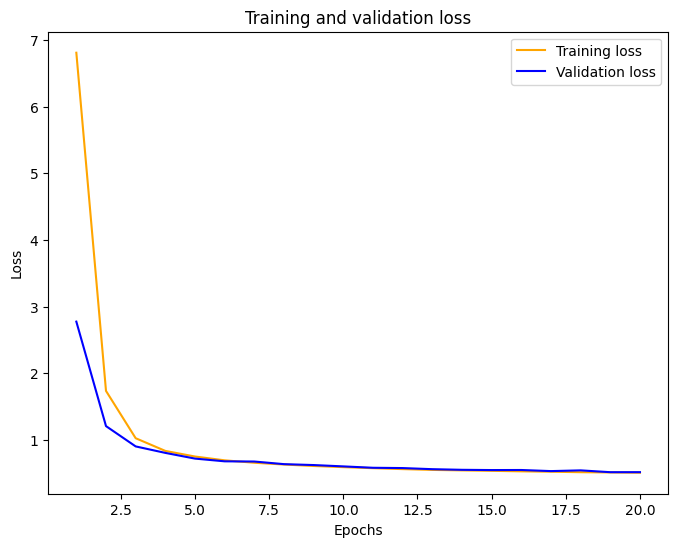

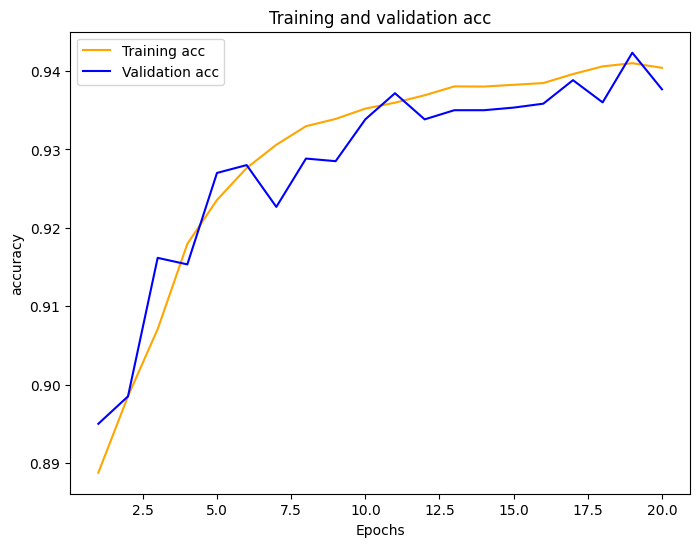

In [53]:
plot_curve(history_L1L2)

In [54]:
### Evaluate the model ###
test_loss, test_acc = network_L1L2.evaluate(test_images, test_labels)
print('Test Loss of L1L2 Kernel/Bias: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.5005 - accuracy: 0.9424
Test Loss of L1L2 Kernel/Bias: 0.5004739761352539
Test Accuracy: 0.9423999786376953


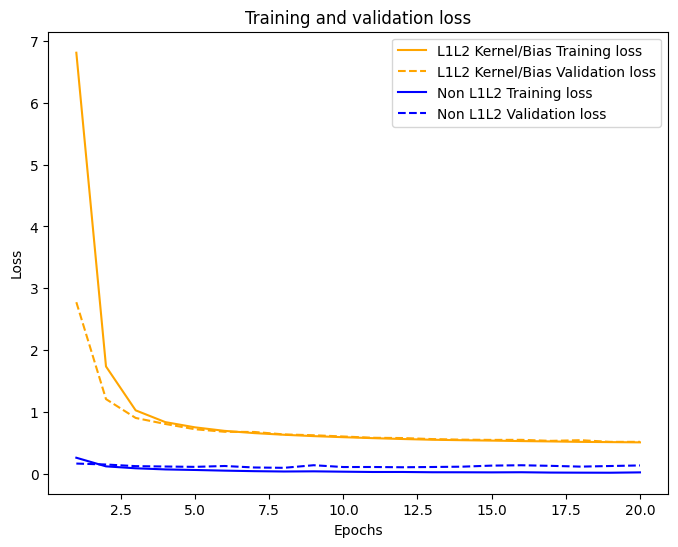

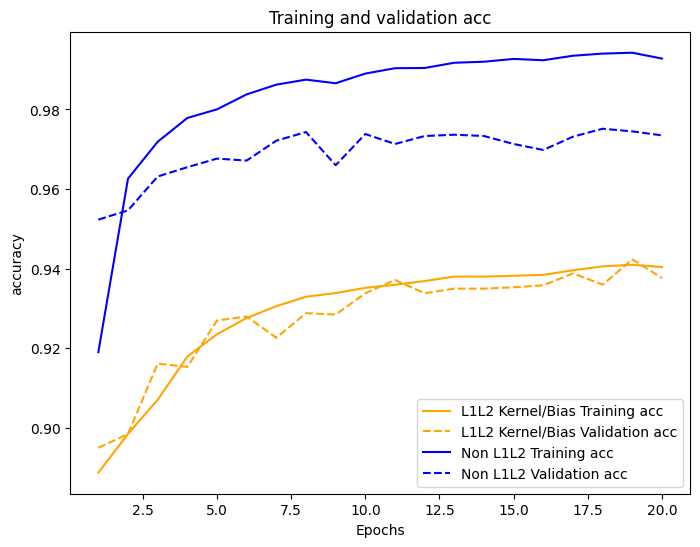

In [55]:
compare_plot(history_L1L2, history2,'L1L2 Kernel/Bias','Non L1L2')

#### 3.3.2 Try L1L2 with Activity

In [56]:
def model_network_L1L2_activity():
  initializer = tensorflow.keras.initializers.HeNormal()    
  alpha1 = 1e-3
  alpha2 = 1e-3
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                           , activity_regularizer=regularizers.l1_l2(l1=alpha1,l2=alpha2)))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

In [57]:
network_L1L2_activity = model_network_L1L2_activity()
history_L1L2_activity = network_L1L2_activity.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 5s 9ms/step - loss: 0.9632 - accuracy: 0.8520 - val_loss: 0.5690 - val_accuracy: 0.9213
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.4749 - accuracy: 0.9476 - val_loss: 0.4375 - val_accuracy: 0.9483
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3848 - accuracy: 0.9629 - val_loss: 0.4099 - val_accuracy: 0.9512
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3457 - accuracy: 0.9670 - val_loss: 0.3915 - val_accuracy: 0.9522
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.3188 - accuracy: 0.9694 - val_loss: 0.3706 - val_accuracy: 0.9518
Epoch 6/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2894 - accuracy: 0.9726 - val_loss: 0.3263 - val_accuracy: 0.9615
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2763 - accuracy: 0.9730 - val_loss: 0.3081 - val_accuracy: 0.9625
Epoch 

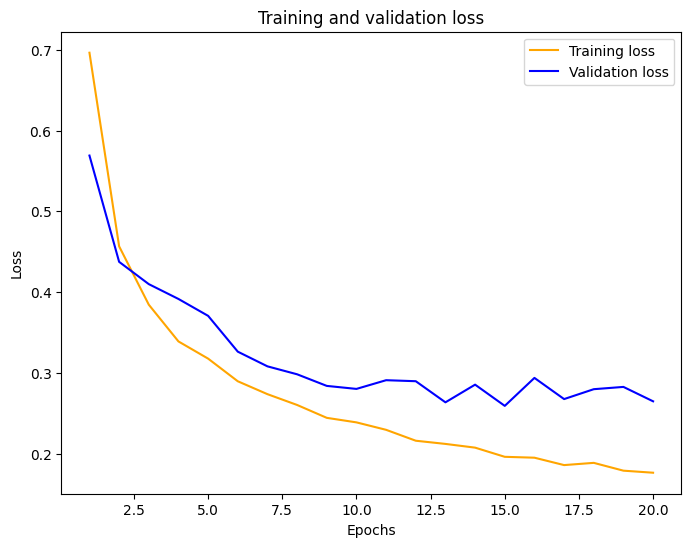

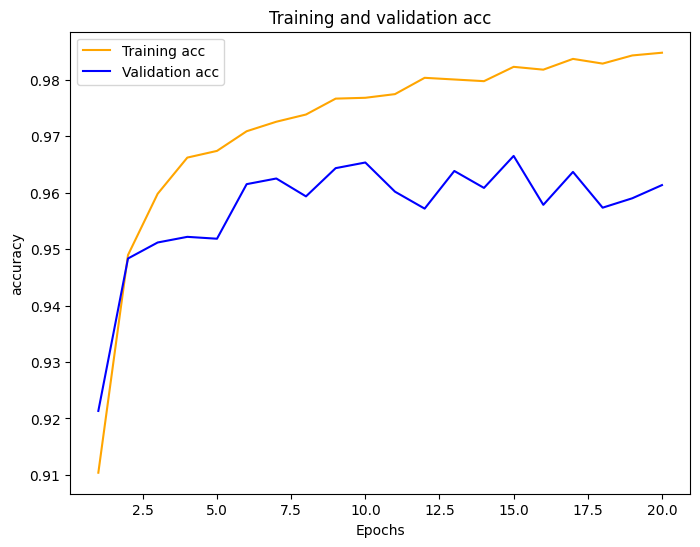

In [58]:
plot_curve(history_L1L2_activity)

In [98]:
### Evaluate the model ###
test_loss, test_acc = network_L1L2_activity.evaluate(test_images, test_labels)
print('Test Loss of L1L2 Activity: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.2513 - accuracy: 0.9649
Test Loss of L1L2 Activity: 0.2512533962726593
Test Accuracy: 0.964900016784668


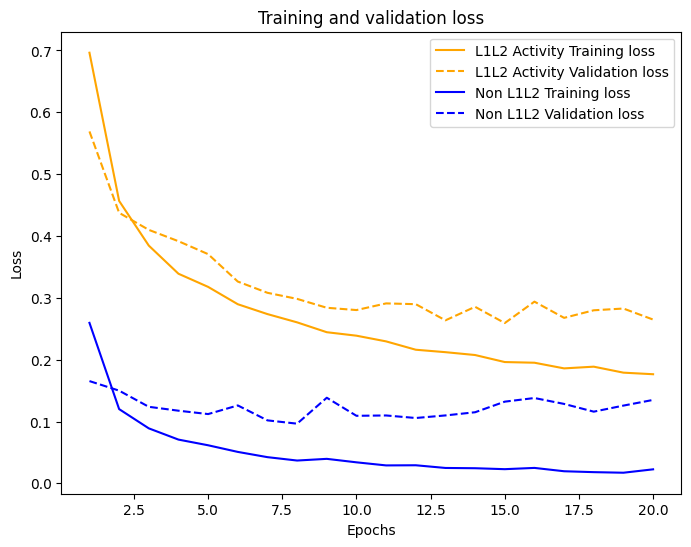

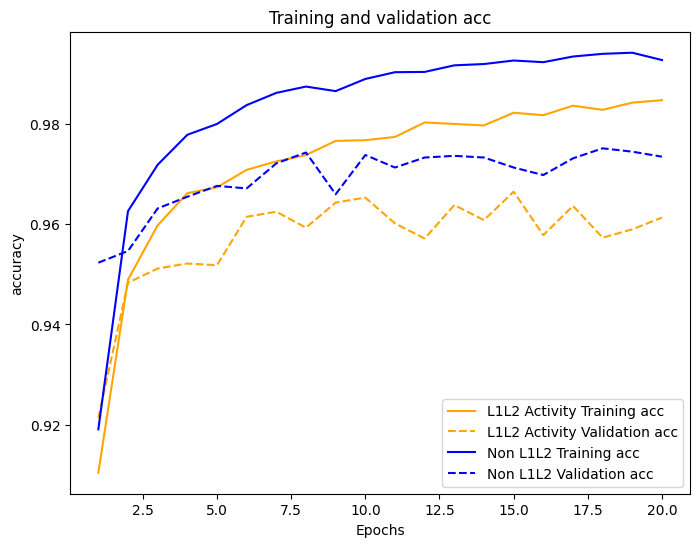

In [60]:
compare_plot(history_L1L2_activity, history2,'L1L2 Activity','Non L1L2')

### 4. Try adding dropout (any dropout rate) with every layer. What effect does it have on your model? Does it help in the reduction of overfit?

In [61]:
from tensorflow.keras.layers import Dropout

In [62]:
def model_network_dropout():
    initializer = tensorflow.keras.initializers.HeNormal()    
    network = models.Sequential()
    network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer))
    network.add(Dropout(0.25))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return network

In [63]:
network_dpo = model_network_dropout()
history_dpo = network_dpo.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 3s 6ms/step - loss: 1.1593 - accuracy: 0.6491 - val_loss: 0.2684 - val_accuracy: 0.9212
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 0.4003 - accuracy: 0.8824 - val_loss: 0.2292 - val_accuracy: 0.9313
Epoch 3/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3168 - accuracy: 0.9056 - val_loss: 0.1792 - val_accuracy: 0.9475
Epoch 4/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2590 - accuracy: 0.9250 - val_loss: 0.1752 - val_accuracy: 0.9500
Epoch 5/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2398 - accuracy: 0.9292 - val_loss: 0.1632 - val_accuracy: 0.9532
Epoch 6/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2075 - accuracy: 0.9385 - val_loss: 0.1431 - val_accuracy: 0.9558
Epoch 7/20
422/422 [==============================] - 3s 6ms/step - loss: 0.1923 - accuracy: 0.9439 - val_loss: 0.1310 - val_accuracy: 0.9625
Epoch 

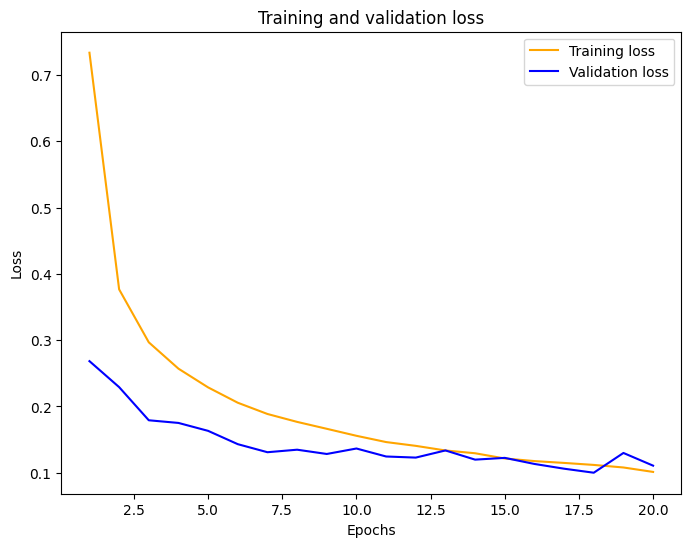

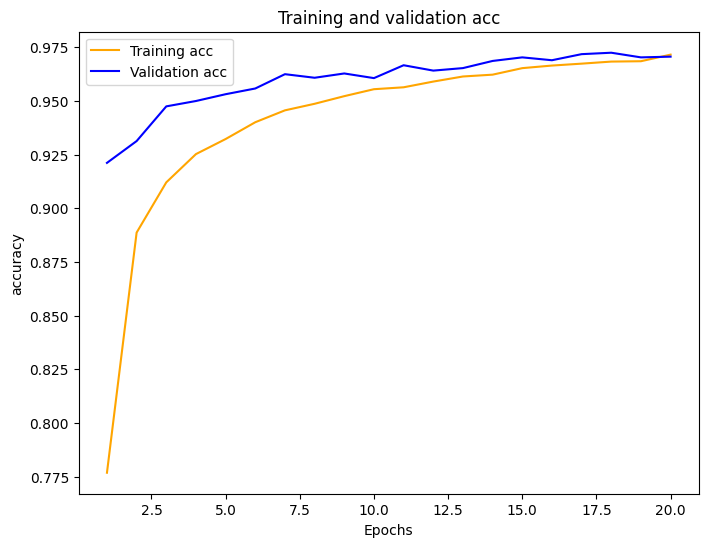

In [64]:
plot_curve(history_dpo)

In [65]:
### Evaluate the model ###
test_loss, test_acc = network_dpo.evaluate(test_images, test_labels)
print('Test Loss of Dropout: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0927 - accuracy: 0.9750
Test Loss of Dropout: 0.09265927225351334
Test Accuracy: 0.9750000238418579


### try to achieve the highest precision

In [66]:
from tensorflow.keras.layers import Dropout
def model_network_tune():
    initializer = tensorflow.keras.initializers.HeNormal()    
    alpha = 1e-6
    network = models.Sequential()
    network.add(layers.Dense(512, activation='elu' ,input_shape=(28*28,), kernel_initializer=initializer
                             , activity_regularizer=regularizers.l2(alpha)))
    network.add(Dropout(0.1))
    network.add(layers.Dense(256, activation='elu', kernel_initializer=initializer
                             , activity_regularizer=regularizers.l2(alpha)))
    network.add(Dropout(0.1))
    network.add(layers.Dense(128, activation='elu', kernel_initializer=initializer
                             , activity_regularizer=regularizers.l2(alpha)))
    network.add(Dropout(0.1))
#     network.add(layers.Dense(64, activation='elu', kernel_initializer=initializer
#                              , kernel_regularizer=regularizers.l2(alpha)))
#     network.add(Dropout(0.2))
    network.add(layers.Dense(10, activation='softmax'))
    
    network.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    return network

In [67]:
network_tune = model_network_tune()
history_tune = network_tune.fit(X_train, y_train, epochs=20, batch_size=1024 ,validation_data=(X_val, y_val))

Epoch 1/20
53/53 [==============================] - 1s 15ms/step - loss: 0.9086 - accuracy: 0.7102 - val_loss: 0.2532 - val_accuracy: 0.9265
Epoch 2/20
53/53 [==============================] - 1s 10ms/step - loss: 0.2446 - accuracy: 0.9276 - val_loss: 0.1896 - val_accuracy: 0.9467
Epoch 3/20
53/53 [==============================] - 0s 8ms/step - loss: 0.1808 - accuracy: 0.9466 - val_loss: 0.1572 - val_accuracy: 0.9548
Epoch 4/20
53/53 [==============================] - 0s 8ms/step - loss: 0.1398 - accuracy: 0.9582 - val_loss: 0.1326 - val_accuracy: 0.9627
Epoch 5/20
53/53 [==============================] - 0s 9ms/step - loss: 0.1174 - accuracy: 0.9639 - val_loss: 0.1185 - val_accuracy: 0.9667
Epoch 6/20
53/53 [==============================] - 1s 10ms/step - loss: 0.1006 - accuracy: 0.9693 - val_loss: 0.1094 - val_accuracy: 0.9690
Epoch 7/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0897 - accuracy: 0.9710 - val_loss: 0.1008 - val_accuracy: 0.9715
Epoch 8/20
53/53

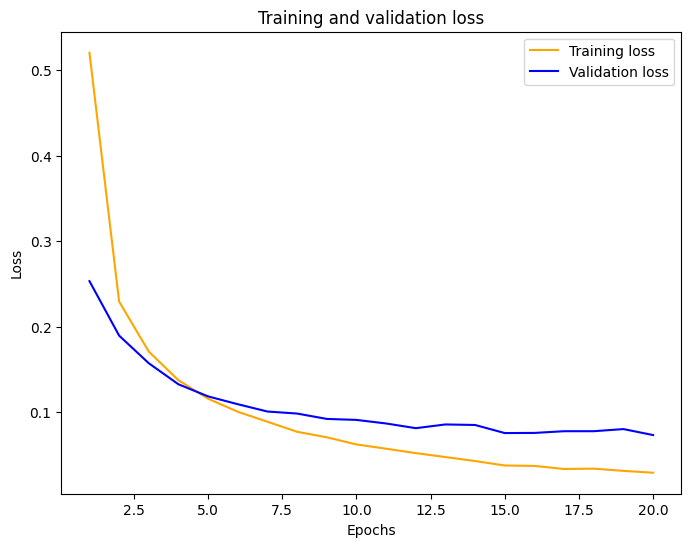

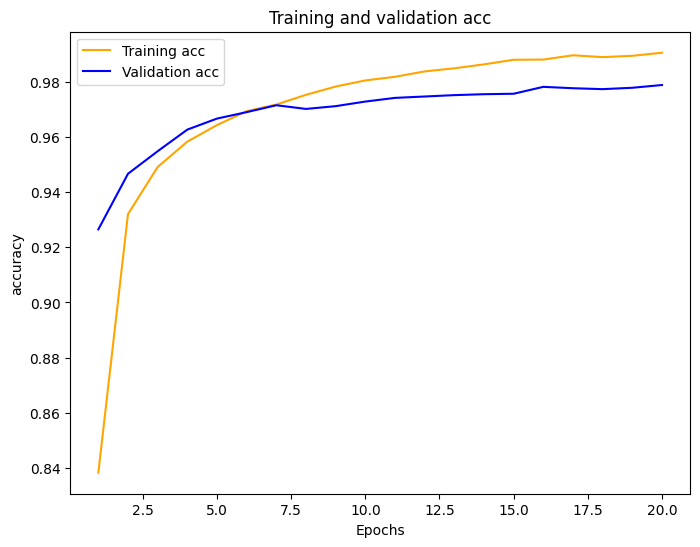

In [68]:
plot_curve(history_tune)

### 7. Final Evaluation

After you've determined that your model is good enough to be deployed in an application, it's time to evaluate it with a test set to ensure that it generalizes well and does not overfit to the validation set.

In [69]:
test_loss, test_acc = network_tune.evaluate(test_images, test_labels)
print('Test Loss of model tuning: %s\nTest Accuracy of model tuning: %s' % (test_loss,test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9811
Test Loss of model tuning: 0.06873312592506409
Test Accuracy of model tuning: 0.9811000227928162


In [70]:
test_pred = network_tune.predict(test_images)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

y_labels = np.argmax(test_labels, axis=1)
y_pred = np.argmax(test_pred, axis=1)
cf_matrix = confusion_matrix(y_labels, y_pred)
df = pd.DataFrame(cf_matrix)
class_names = []
for i in range(10):
    class_names.append(str(i))

In [72]:
df

,0,1,2,3,4,5,6,7,8,9
0,973,1,0,0,0,1,2,1,2,0
1,0,1126,2,1,0,1,2,1,2,0
2,3,2,1004,3,1,0,1,7,10,1
3,0,0,1,996,0,1,0,4,4,4
4,0,0,2,1,956,1,4,3,2,13
5,2,0,0,16,2,863,2,0,5,2
6,6,2,0,1,3,2,940,0,4,0
7,1,1,8,2,0,0,0,1010,3,3
8,2,0,0,4,1,3,0,3,959,2
9,2,2,0,4,4,2,0,3,8,984


In [73]:
print("\n"+ classification_report(y_labels, y_pred, target_names=class_names))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Result & Discussion 

- Summarize the main findings from this lab. Discuss what you did, what you got as a result, and why (support your reason)

### 8. Play with your model

1. Create a 28x28 pixel (any resolution) drawing in any drawing application (for example, Paint or Adobe Photoshop) with a black (#000000) background and white (#FFFFFF) paint.

2. Draw three distinct single digit numbers from 0 to 9. The images should then be saved in PNG format.

3. Install open-cv by
    <br/>for local pc :
 (See https://pypi.org/project/opencv-python)  
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

    for colab use:
```import cv2 as cv```

4. Load your images to this IPython using the ```imread()``` function
5. Preprocess the images in the same way you did during the development process.
6. Feed your images to your best model.

What class does your model predict? Is it correct? If not, why does it still get a wrong result when your model is more than 90% accurate?

In [74]:
import cv2
import glob as gb
import os

path = './myDigit'
img_dataset = []

files = gb.glob(path+'/*.jpg')
for file in files:
    n = cv2.imread(file,1)
    gray_image = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
    img_dataset.append(gray_image)    
        
# for img in os.listdir(path):
#     files=gb.glob(path+'/*.jpg')
#     for file in files:
#         n = cv2.imread(file,1)
#         img_dataset.append(n)      

img_dataset = np.array(img_dataset)

In [75]:
img_dataset.shape

(10, 28, 28)

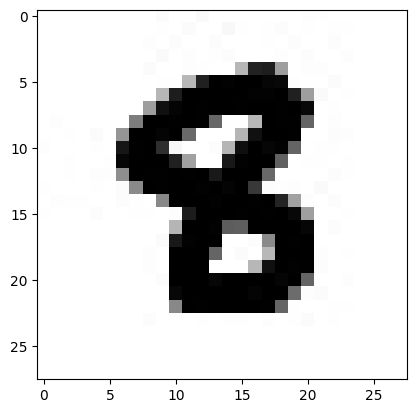

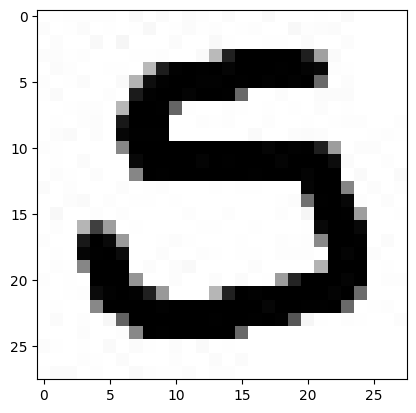

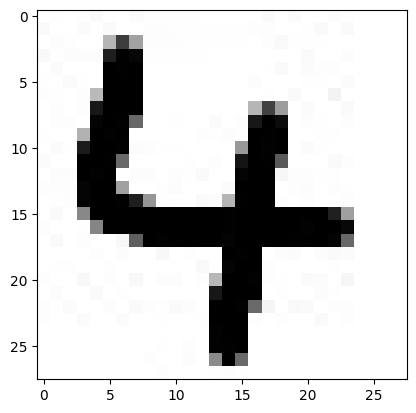

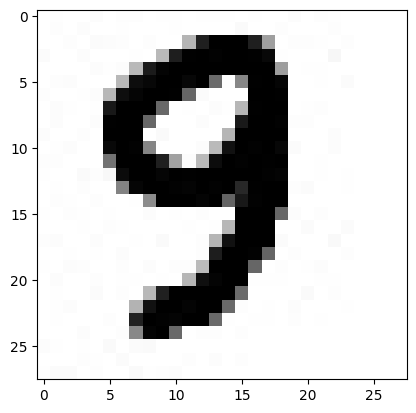

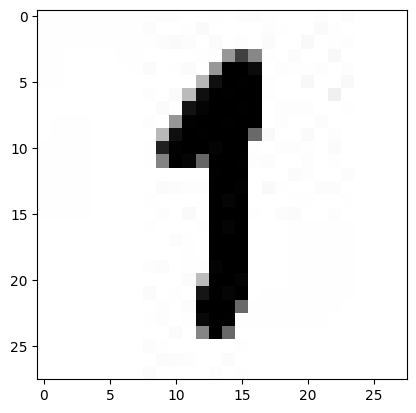

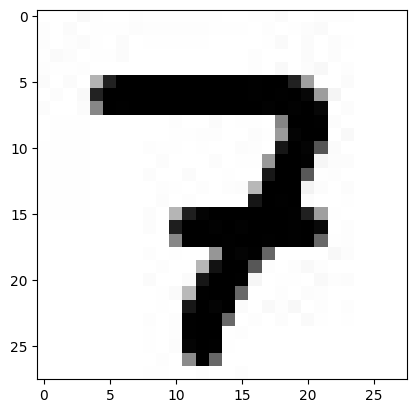

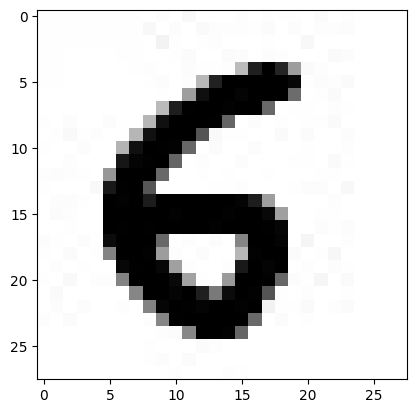

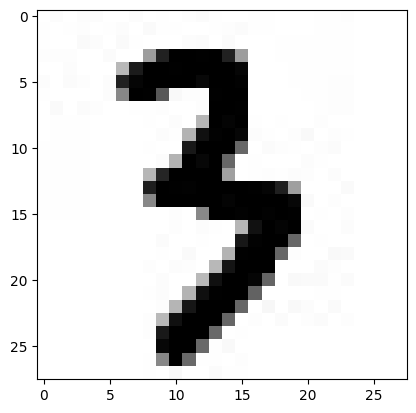

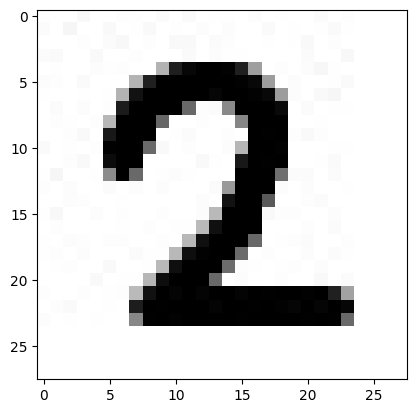

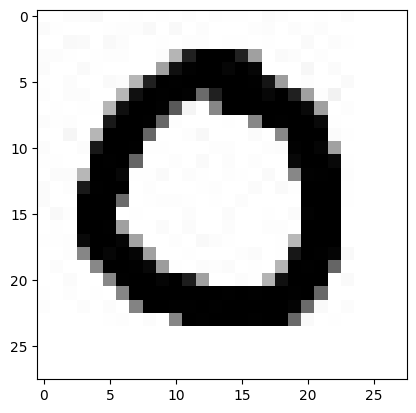

In [76]:
for i in range(len(img_dataset)):
    plt.imshow(img_dataset[i], cmap=plt.cm.binary)
    plt.show()

In [77]:
# Reshape and Normalize
img_dataset = img_dataset.reshape(10, 28*28)
img_dataset = img_dataset.astype('float32')/255

In [78]:
myPred = network_tune.predict(img_dataset)
def playModel(myPred,idx):
    img = img_dataset[idx].reshape(28,28)
    plt.imshow(img)
    probLabel = myPred[idx]
    label = 'Label: %s '%str(probLabel.argmax())
    plt.title(str(label))

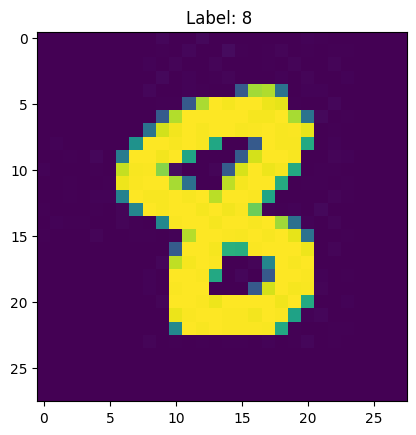

In [79]:
playModel(myPred,0)

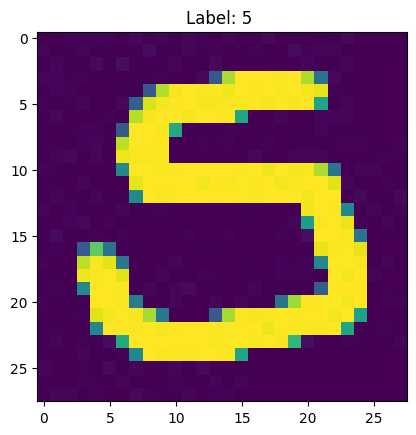

In [80]:
playModel(myPred,1)

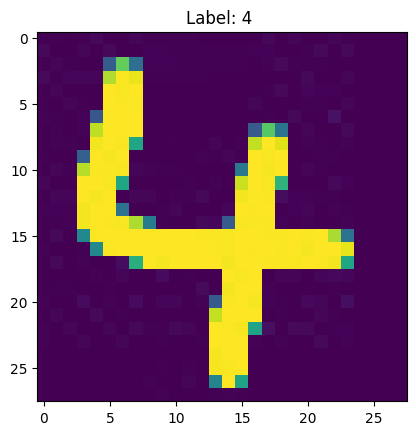

In [81]:
playModel(myPred,2)

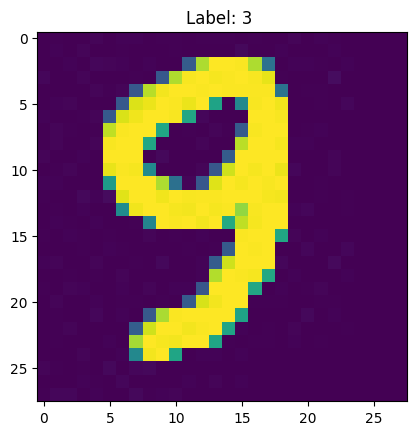

In [82]:
playModel(myPred,3)

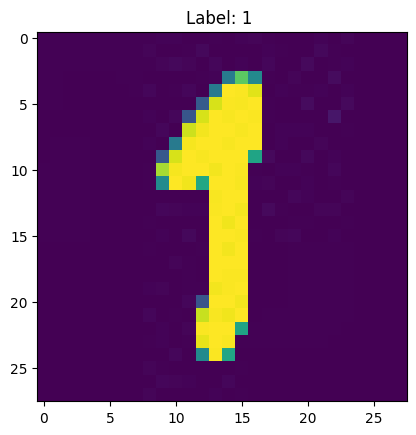

In [83]:
playModel(myPred,4)

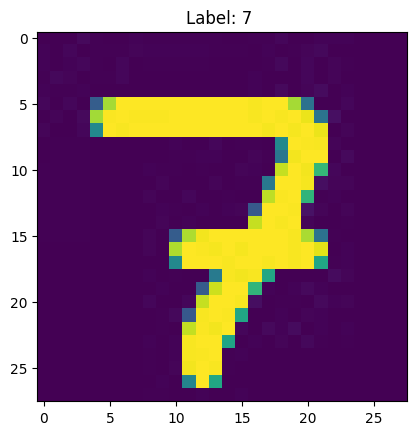

In [84]:
playModel(myPred,5)

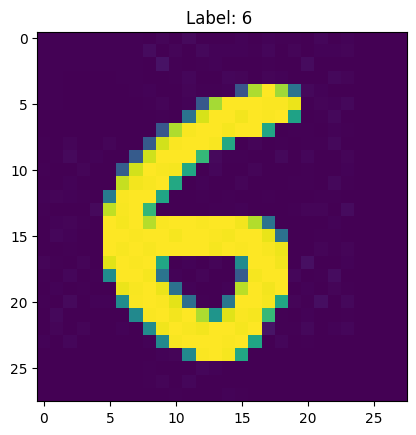

In [85]:
playModel(myPred,6)

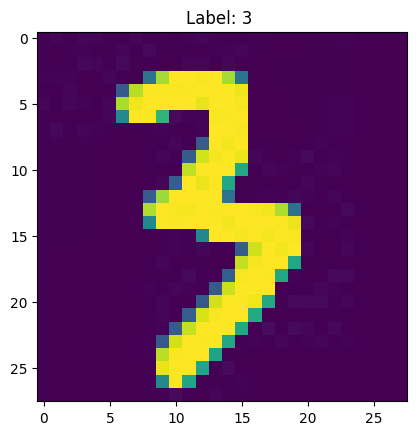

In [86]:
playModel(myPred,7)

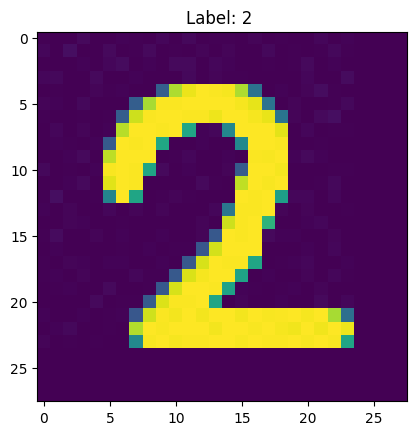

In [87]:
playModel(myPred,8)

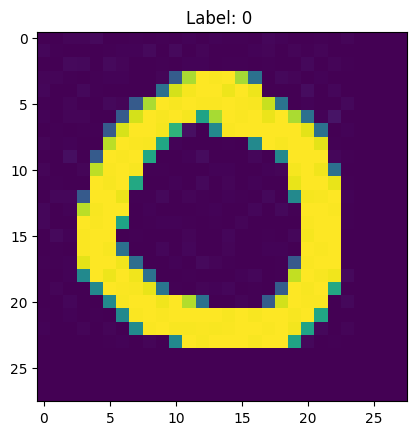

In [88]:
playModel(myPred,9)

### Challenges: Play with initializer

- Build a two-layer neural network with any hyperparameter
- Use or create a weight initializer function that sets all the weights to one. See: https://keras.io/initializers/
- Discuss the results. What happened? and why?

In [89]:
from tensorflow.keras import initializers

In [90]:
initializer = tensorflow.keras.initializers.Ones()
values = initailizer(shape=(28,28))
values

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[ 2.33611196e-01, -3.93634010e-03, -3.40902299e-01,
         2.18493445e-03,  3.24011236e-01,  1.24568008e-01,
         2.33216509e-01, -2.52476186e-01, -1.41897649e-01,
         4.79844259e-03, -1.30281001e-01,  3.35801728e-02,
         5.99539042e-01, -6.05551340e-02,  8.45637992e-02,
         2.87915975e-01,  4.97911394e-01,  2.36044273e-01,
         1.60805106e-01,  5.72792411e-01, -3.64410907e-01,
         2.55386233e-01,  1.65694490e-01, -5.43912888e-01,
         1.15069762e-01, -3.14248145e-01, -4.75466639e-01,
        -7.59706721e-02],
       [-1.49644881e-01, -3.20671886e-01, -9.39903259e-02,
         3.58214706e-01, -2.91934490e-01, -7.42992386e-02,
         3.95549208e-01, -1.65293574e-01, -2.54460722e-01,
         3.06861609e-01,  3.64878416e-01, -1.04327641e-01,
         1.07873648e-01, -1.92466453e-02, -6.06139190e-02,
         5.37899494e-01,  9.96332839e-02,  5.38265817e-02,
        -4.99514133e-01, -2.92220145e-0

In [91]:
model1 = models.Sequential()
model1.add(layers.Dense(128, activation='elu', input_shape=(28*28,),kernel_initializer=initializer))
# model1.add(layers.Dense(128, activation='elu',kernel_initializer=initializer))
model1.add(layers.Dense(10, activation='softmax')) 

In [92]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [93]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_82 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [94]:
histoy_model1 = model1.fit(X_train, y_train, epochs=10, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/10
422/422 [==============================] - 2s 3ms/step - loss: 19.5969 - accuracy: 0.5465 - val_loss: 0.3884 - val_accuracy: 0.8908
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4258 - accuracy: 0.8730 - val_loss: 0.4545 - val_accuracy: 0.8722
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4168 - accuracy: 0.8802 - val_loss: 0.7396 - val_accuracy: 0.7927
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4512 - accuracy: 0.8747 - val_loss: 0.4026 - val_accuracy: 0.8912
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.8809 - val_loss: 0.4520 - val_accuracy: 0.8928
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4323 - accuracy: 0.8861 - val_loss: 0.4674 - val_accuracy: 0.8902
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.4561 - accuracy: 0.8852 - val_loss: 0.6582 - val_accuracy: 0.8540
Epoch

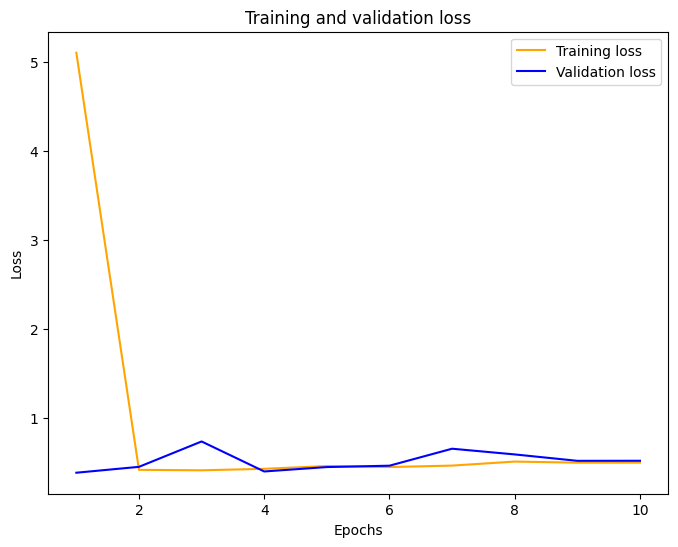

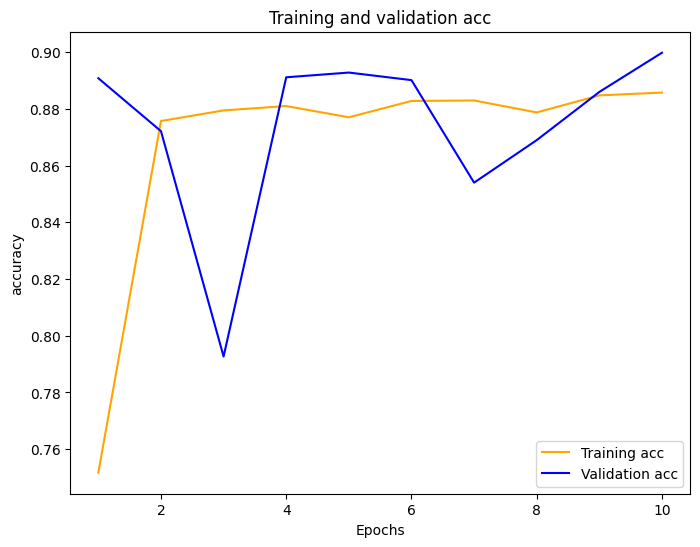

In [95]:
plot_curve(histoy_model1)

In [96]:
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels,verbose=0)
print('Test Loss of model Ones initializer: %s\nTest Accuracy of model Ones initializer: %s' % (test_loss1,test_acc1))
print('\n')
test_loss, test_acc = network1.evaluate(test_images, test_labels,verbose=0)
print('Test Loss of model He initializer: %s\nTest Accuracy of model He initializer: %s' % (test_loss,test_acc))

Test Loss of model Ones initializer: 0.505696177482605
Test Accuracy of model Ones initializer: 0.8970999717712402


Test Loss of model He initializer: 0.08461476117372513
Test Accuracy of model He initializer: 0.9768999814987183


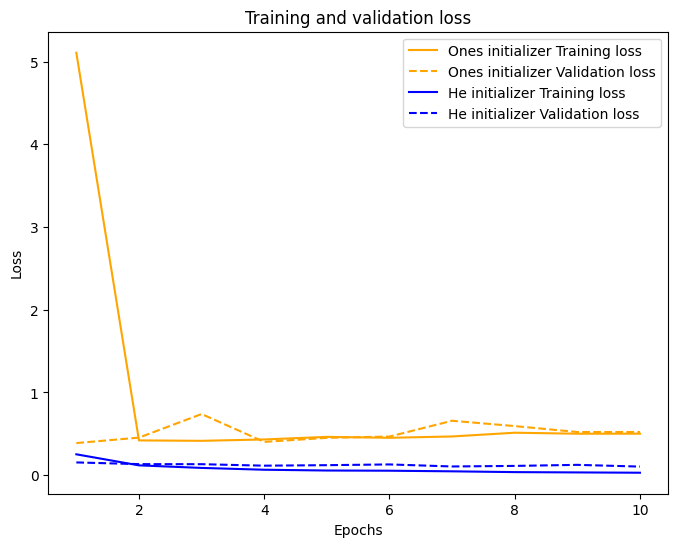

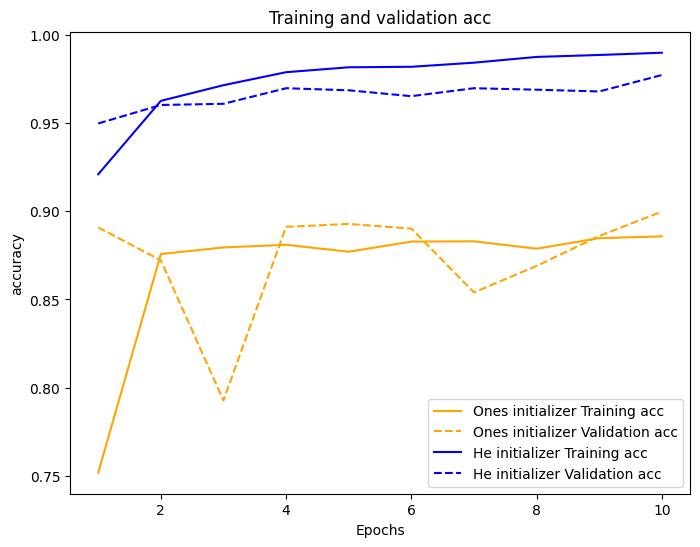

In [97]:
compare_plot(histoy_model1, history, 'Ones initializer', 'He initializer')

#### Discussion

 จากการลองเล่น